## Analyse de résultats


In [10]:
!pip install evaluate
!pip install scikit-learn
!pip install matplotlib

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------- -------------------------- 2.9/8.7 MB 15.0 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 14.5 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 13.9 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit

## 1. Manuscrit corrigé à partir du modèle finetuné

In [18]:
# Corrected vs Ground Truth
from evaluate import load
import os
import re

# load
def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

# dirs
ground_truth_folder = "manuscript_groundtruth"
corrected_folder    = "manuscript_final"

# load
ref = load_text_from_alto(ground_truth_folder)       # list of strings
cor = load_text_from_alto(corrected_folder)

wer = load("wer")
cer = load("cer")

# join strings
predictions = [" ".join(cor)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("Corrected vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")


Corrected vs Ground Truth:
WER: 0.2782608695652174
CER: 0.1556342261705965


V6: (4ème version - correction CSV- distance 7, différence caractères 4)
Corrected vs Ground Truth:
WER: 0.2782608695652174
CER: 0.1556342261705965

V6: (3ème version - correction CSV- distance 6)
Corrected vs Ground Truth:
WER: 0.2787185354691076
CER: 0.15623538841760737

V6: (2ème version - correction CSV- distance 5)
Corrected vs Ground Truth:
WER: 0.280091533180778
CER: 0.1569033464698417

V6: (1ère version - correction CSV- distance 4)
Corrected vs Ground Truth:
WER: 0.28421052631578947
CER: 0.1598423618996727

Avec V5: Corrected vs Ground Truth:
WER: 0.32051282051282054
CER: 0.16265865063460253

In [19]:
# Corrected vs Ground Truth - without footnotes
from evaluate import load
import os
import re

# load
def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

# dirs
ground_truth_folder = "manuscript_groundtruth_nofootnotes"
corrected_folder    = "manuscript_final_nofootnotes"

# load
ref = load_text_from_alto(ground_truth_folder)       # list of strings
cor = load_text_from_alto(corrected_folder)

wer = load("wer")
cer = load("cer")

# join strings
predictions = [" ".join(cor)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("Corrected vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")

Corrected vs Ground Truth:
WER: 0.27022900763358776
CER: 0.1576757427549456


In [17]:
# HTR vs Ground Truth
from evaluate import load
import os
import re

# load
def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

# dirs
ground_truth_folder = "manuscript_groundtruth"
htr_folder          = "manuscript_htr24"

# load
ref = load_text_from_alto(ground_truth_folder)        # list of strings
htr = load_text_from_alto(htr_folder)

wer = load("wer")
cer = load("cer")

# join strings
predictions = [" ".join(htr)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("HTR vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")


HTR vs Ground Truth:
WER: 0.6054919908466819
CER: 0.26591410059448267


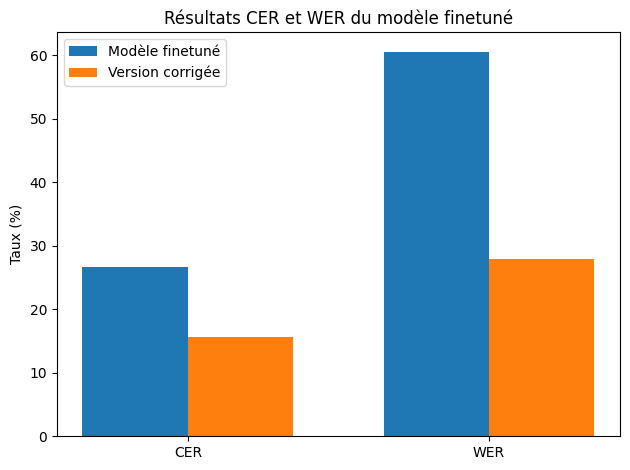

In [20]:
# Graphic

import matplotlib.pyplot as plt
import numpy as np

methods = ["CER", "WER"]
Finetuned = [26.59, 60.54]
Corrected = [15.56, 27.82]

x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, Finetuned, width, label="Modèle finetuné")
ax.bar(x + width/2, Corrected, width, label="Version corrigée")

ax.set_ylabel("Taux (%)")
ax.set_title("Résultats CER et WER du modèle finetuné")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.tight_layout()

plt.savefig("cer_wer_far.png", dpi=300, bbox_inches="tight")

plt.show()

In [25]:
# Pourcentages 

initial = float(60.54)
final = float(27.82)

amélioration = ((initial - final) / initial) * 100

print(amélioration, "%")


54.04691113313511 %


Amélioration  
CER: 41 %  
WER: 54 %

In [15]:
# Sans les mots barrés
# Corrected vs Ground Truth

from evaluate import load
import os
import re

def clean_text(lines):
    cleaned = []
    for line in lines:
        line = re.sub(r"<[^>]+>", "", line)
        line = re.sub(r"[.,;!?“”\"«»()\[\]…]", "", line)
        cleaned.append(line.strip())
    return cleaned

def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

ground_truth_folder = "manuscript_groundtruth"
corrected_folder    = "manuscript_final"

raw_ref = load_text_from_alto(ground_truth_folder)
raw_cor = load_text_from_alto(corrected_folder)

ref = clean_text(raw_ref)
cor = clean_text(raw_cor)

wer = load("wer")
cer = load("cer")

predictions = [" ".join(cor)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("Corrected vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")


Corrected vs Ground Truth:
WER: 0.2453789279112754
CER: 0.1260784016951718


Corrected vs Ground Truth:
WER: 0.06239460370994941
CER: 0.02585258525852585

In [16]:
# Sans les mots barrés
# HTR vs Ground Truth

from evaluate import load
import os
import re

def clean_text(lines):
    cleaned = []
    for line in lines:
        line = re.sub(r"<[^>]+>", "", line)
        line = re.sub(r"[.,;!?“”\"«»()\[\]…]", "", line)
        cleaned.append(line.strip())
    return cleaned

def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

ground_truth_folder = "manuscript_groundtruth"
htr_folder          = "manuscript_htr17"

raw_ref = load_text_from_alto(ground_truth_folder)
raw_htr = load_text_from_alto(htr_folder)

ref = clean_text(raw_ref)
htr = clean_text(raw_htr)

wer = load("wer")
cer = load("cer")

predictions = [" ".join(htr)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("HTR vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")

HTR vs Ground Truth:
WER: 0.2675600739371534
CER: 0.21174511881337976


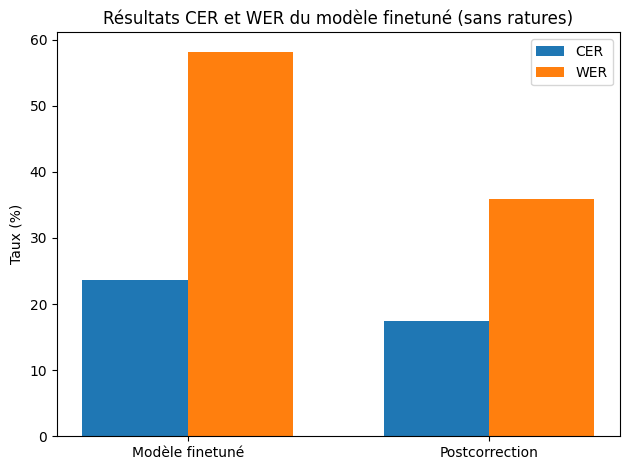

In [46]:
# Graphic

import matplotlib.pyplot as plt
import numpy as np

# Données
methods = ["Modèle finetuné", "Postcorrection"]
methods = ["Modèle finetuné", "Postcorrection"]
CER = [23.6, 17.36]
WER = [58.18, 35.84]

x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, CER, width, label="CER")
ax.bar(x + width/2, WER, width, label="WER")

ax.set_ylabel("Taux (%)")
ax.set_title("Résultats CER et WER du modèle finetuné (sans ratures)")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.tight_layout()

plt.savefig("cer_wer_fsr.png", dpi=300, bbox_inches="tight")

plt.show()

## 2. Corpus corrigé à partir du modèle généraliste

In [39]:
# Corrected vs Ground Truth
from evaluate import load
import os
import re

# load
def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

# dirs
ground_truth_folder = "manuscript_groundtruth"
corrected_folder    = "manuscript_final_généraliste"

# load
ref = load_text_from_alto(ground_truth_folder)       # list of strings
cor = load_text_from_alto(corrected_folder)

wer = load("wer")
cer = load("cer")

# join strings
predictions = [" ".join(cor)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("Corrected vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")


Corrected vs Ground Truth:
WER: 0.5730645900137425
CER: 0.3736111111111111


In [40]:
# HTR vs Ground Truth
from evaluate import load
import os
import re

# load
def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

# dirs
ground_truth_folder = "manuscript_groundtruth"
htr_folder          = "manuscript_htr_généraliste"

# load
ref = load_text_from_alto(ground_truth_folder)        # list of strings
htr = load_text_from_alto(htr_folder)

wer = load("wer")
cer = load("cer")

# join strings
predictions = [" ".join(htr)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("HTR vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")


HTR vs Ground Truth:
WER: 0.8873110398534128
CER: 0.4630952380952381


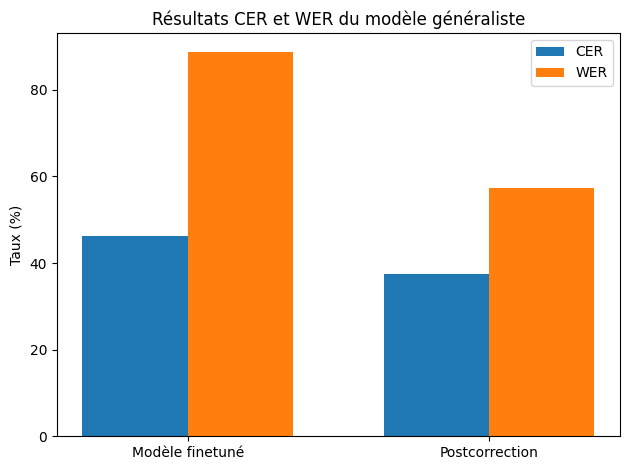

In [47]:
# Graphic

import matplotlib.pyplot as plt
import numpy as np

# Données
methods = ["Modèle généraliste", "Postcorrection"]
CER = [46.3, 37.36]
WER = [88.73, 57.3]

x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, CER, width, label="CER")
ax.bar(x + width/2, WER, width, label="WER")

ax.set_ylabel("Taux (%)")
ax.set_title("Résultats CER et WER du modèle généraliste")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.tight_layout()

plt.savefig("cer_wer_gar.png", dpi=300, bbox_inches="tight")

plt.show()

In [48]:
# Sans les mots barrés
# Corrected vs Ground Truth

from evaluate import load
import os
import re

def clean_text(lines):
    cleaned = []
    for line in lines:
        # Quitar tokens como <...> o <... ...> incluyendo los signos <>
        line = re.sub(r"<[^>]+>", "", line)
        # Quitar puntuación (pero conservar apóstrofes, guiones si deseas)
        line = re.sub(r"[.,;!?“”\"«»()\[\]…]", "", line)
        # Normalizar espacios
        cleaned.append(line.strip())
    return cleaned

def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

ground_truth_folder = "manuscript_groundtruth"
corrected_folder    = "manuscript_final_généraliste"

raw_ref = load_text_from_alto(ground_truth_folder)
raw_cor = load_text_from_alto(corrected_folder)

ref = clean_text(raw_ref)
cor = clean_text(raw_cor)

wer = load("wer")
cer = load("cer")

predictions = [" ".join(cor)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("Corrected vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")


Corrected vs Ground Truth:
WER: 0.5527289546716003
CER: 0.36023400585014625


In [49]:
# Sans les mots barrés
# HTR vs Ground Truth

from evaluate import load
import os
import re

def clean_text(lines):
    cleaned = []
    for line in lines:
        # Quitar tokens como <...> o <... ...> incluyendo los signos <>
        line = re.sub(r"<[^>]+>", "", line)
        # Quitar puntuación (pero conservar apóstrofes, guiones si deseas)
        line = re.sub(r"[.,;!?“”\"«»()\[\]…]", "", line)
        # Normalizar espacios
        cleaned.append(line.strip())
    return cleaned

def load_text_from_alto(folder):
    alto_files = sorted(f for f in os.listdir(folder) if f.endswith('.xml'))
    text = []
    for fn in alto_files:
        with open(os.path.join(folder, fn), encoding='utf-8') as f:
            content = f.read()
            strings = re.findall(r'CONTENT="(.*?)"', content)
            text.extend(strings)
    return text

ground_truth_folder = "manuscript_groundtruth"
htr_folder          = "manuscript_htr_généraliste"

raw_ref = load_text_from_alto(ground_truth_folder)
raw_htr = load_text_from_alto(htr_folder)

ref = clean_text(raw_ref)
htr = clean_text(raw_htr)

wer = load("wer")
cer = load("cer")

predictions = [" ".join(htr)]
references  = [" ".join(ref)]

wer_score = wer.compute(predictions=predictions, references=references)
cer_score = cer.compute(predictions=predictions, references=references)

print("HTR vs Ground Truth:")
print(f"WER: {wer_score}")
print(f"CER: {cer_score}")

HTR vs Ground Truth:
WER: 0.8857539315448658
CER: 0.46351158778969476


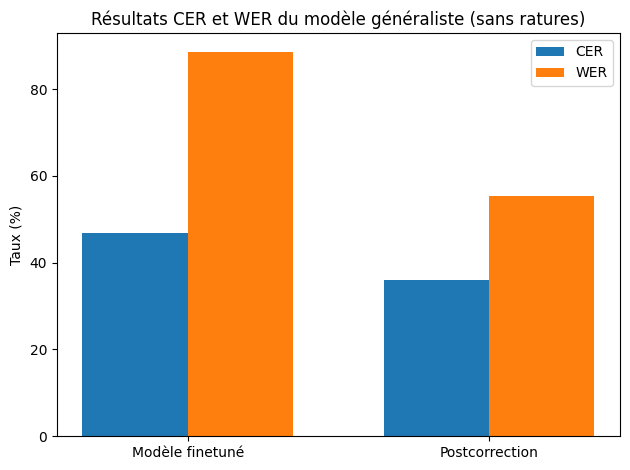

In [50]:
# Graphic

import matplotlib.pyplot as plt
import numpy as np

# Données
methods = ["Modèle finetuné", "Postcorrection"]
CER = [46.88, 36.02]
WER = [88.55, 55.27]

x = np.arange(len(methods))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, CER, width, label="CER")
ax.bar(x + width/2, WER, width, label="WER")

ax.set_ylabel("Taux (%)")
ax.set_title("Résultats CER et WER du modèle généraliste (sans ratures)")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

plt.tight_layout()

plt.savefig("cer_wer_gsr.png", dpi=300, bbox_inches="tight")

plt.show()